# Assignment 1 - Supervised Learning

# Part 1 - Logistic Regression



# Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import files
import io


# Question 1

# 1.1 Load Dataset

In [16]:
uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [18]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes (2).csv']))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1.2 Mean, Std, Min, Max for each Feature

In [19]:
df.describe().loc[['mean', 'std', 'min', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 1.3 Plot Variables

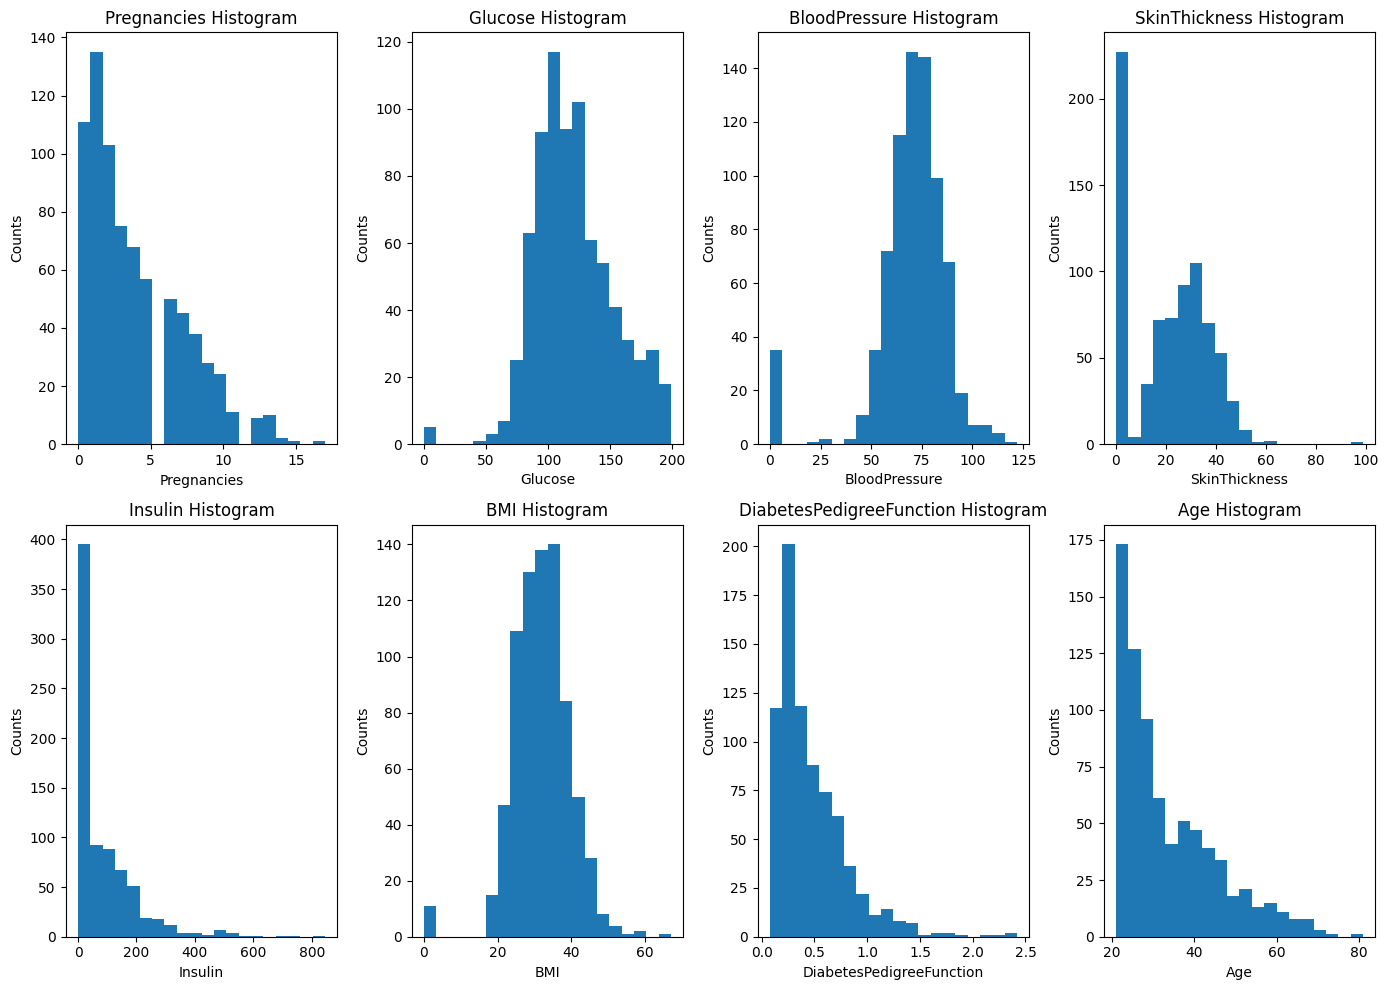

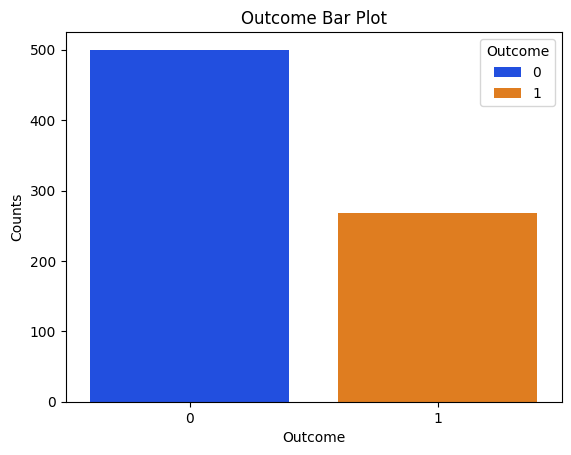

In [20]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(14, 10))
for i in range(len(features)):
    plt.subplot(2, 4, i + 1)
    plt.hist(df[features[i]], bins=20)
    plt.title(f'{features[i]} Histogram')
    plt.xlabel(features[i])
    plt.ylabel('Counts')
plt.tight_layout()
plt.show()

sns.countplot(x='Outcome', data=df, hue='Outcome', palette='bright')
plt.title('Outcome Bar Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()


#Question 2

Η ποιότητα των δεδομένων είναι κακή γιατί:
1. Υπάρχουν αρκετές μηδενικές τιμές (για παράδειγμα Insulin, Skin Thickness, BMI, Clucose, Blood Preasure) οι οποίες μπορεί να οφείλονται σε ελληπή δεδομένα ή σε λάθος καταγραφές, κάτι το οποίο υποβαθμίζει την αξιοπιστία των δεδομένων.
2. Κάποιες τιμές (για παράδειγμα οι Pregnancies) φαίνονται να μην είναι πραγματικές, κάτι το οποίο  μπορεί να επηρεάσει σημαντικά την σωστή πρόβλεψη.
3. Κάποιες κατανομές έχουν μεγάλη διακύμανση (για παράδειγμα η Insulin), κάτι το οποίο αποτελεί ένδειξη για ακραίες τιμές.


#Question 3
---



H κατανομή που ακολουθεί η μεταβλητή Age μοιάζει με την εκθετική. Οι περισσότερες τιμές παρατηρούνται στις μικρότερες ηλικίες κάτι που καθιστά την κατανομή αυτή καλή για την ανίχνευση διαβήτη στις μικρές ηλικίες, όχι όμως για τις μεγαλύτερες. Ως αποτέλεσμα, η κατανομή αυτή δεν είναι καλή για την κατασκευή της συγκεκριμένης εφαρμογής, καθώς το μοντέλο δεν θα είναι αξιόπιστο σε προβλέψεις για ηλικιωμένους.


#Question 4


In [21]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


Υπολογίζοντας τη συσχέτιση (correlation) μεταξύ των χαρακτηριστικών του dataset και την πιθανή εμφάνιση διαβήτη, παρατηρείται ότι η γλυκόζη έχει τη μεγαλύτερη συσχέτιση. Συνεπώς, αν κάποιος ασθενής έχει υψηλά επίπεδα γλυκόζης είναι πολύ πιθανό να εμφανίσει διαβήτη.


#Question 5


# 5.1 Convert DataFrame to Numpy arrays

In [22]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape


((768, 8), (768,))

# 5.2 Split Dataset to Train-Test

Train Samples: 537
Test Samples: 231

In [23]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((537, 8), (537,), (231, 8), (231,))

#Question 6




# 6.1 Create a Logistic Regression Model

In [24]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# 6.2 Train Model on Training Set

In [25]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# 6.3.1 Evaluate Model on Test Set

In [26]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [27]:
accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 77.92


# 6.3.2 Evaluate Model on Train Set

In [28]:
y_pred_train = model.predict(x_train)
y_pred_train

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [29]:
accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 76.54


Η ακρίβεια του test set είναι 77.92%, ενώ του train set 76.54%. Οι τιμές αυτές είναι πολύ κοντά, κάτι το οποίο σημαίνει ότι δεν υπάρχει υπερεκπαίδευση και το μοντέλο γενικεύει καλά.

#Question 7

# 7.1 Evaluate Patients with Age 0 - 25, 25 - 50, > 50.


In [30]:
input_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [44]:
# Create a mask that filters patients with age <= 25. Age is found at x_test[:, 7]
age_index = 7
mask_25 = x_test[:, 7] < 25

x_test_25 = x_test[mask_25]
y_test_25 = y_test[mask_25]
y_pred_25 = model.predict(x_test_25)

accuracy_25 = accuracy_score(y_test_25, y_pred_25)
accuracy_percentage_25 = round(accuracy_25*100, 2)

print(f'The accuracy of the model for the age group 0-25 is: {accuracy_percentage_25}')


# Create a mask that filters patients with 25 <= age <= 50.
mask_25_50 = (x_test[:, 7] >= 25) & (x_test[:, 7] <= 50)

x_test_25_50 = x_test[mask_25_50]
y_test_25_50 = y_test[mask_25_50]
y_pred_25_50 = model.predict(x_test_25_50)

accuracy_25_50 = accuracy_score(y_test_25_50, y_pred_25_50)
accuracy_percentage_25_50 = round(accuracy_25_50*100, 2)

print(f'The accuracy of the model for the age group 25-50 is: {accuracy_percentage_25_50}')


# Create a mask that filters patients with age > 50.
mask_50_plus = x_test[:, 7] > 50

x_test_50_plus = x_test[mask_50_plus]
y_test_50_plus = y_test[mask_50_plus]
y_pred_50_plus = model.predict(x_test_50_plus)

accuracy_50_plus = accuracy_score(y_test_50_plus, y_pred_50_plus)
accuracy_percentage_50_plus = round(accuracy_50_plus*100, 2)

print(f'The accuracy of the model for the age group 50+ is: {accuracy_percentage_50_plus}')

The accuracy of the model for the age group 0-25 is: 83.78
The accuracy of the model for the age group 25-50 is: 72.79
The accuracy of the model for the age group 50+ is: 90.48


# 7.2 Plot Accuracies

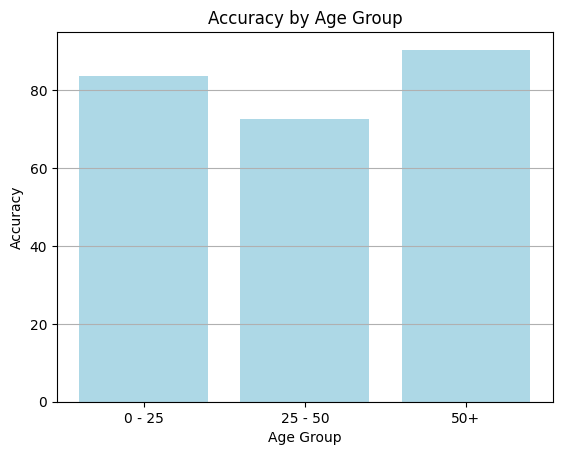

In [54]:
x_index = ['0 - 25', '25 - 50', '50+']
y_index = [accuracy_percentage_25, accuracy_percentage_25_50, accuracy_percentage_50_plus]

plt.bar(x_index, y_index, color='lightblue')
plt.title('Accuracy by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

Ο ταξινομητής φαίνεται ότι έχει καλύτερη ακρίβεια, >90%, για την ηλικιακή ομάδα 50+, κάτι το οποίο σημαίνει ότι τα χαρακτηριστικά των ασθενών αυτής της ηλικιακής ομάδας είναι πιο σαφή και εύκολα διαχωρίσιμα, καθώς και η κλινική τους εικόνα είναι πιο ξεκάθαρη. Στη συνέχεια, ακολουθεί η ομάδα 0-25, που και για αυτή παρατηρείται ακρίβεια > 80%. Από την άλλη πλευρά, η ηλικιακή ομάδα 25-50 έχει ακρίβεια 72.79%, κάτι το οποίο σημαίνει ο ταξινομητής δε δουλεύει και τόσο καλα σε αυτή την ηλικιακή ομάδα, σε σύγκριση με τις άλλες. Αυτό το γεγονός, μπορεί να οφείλεται σε θόρυβο ή σε ανεπαρκή δεδομένα εκπαίδευσης για την εν λόγω ηλικιακή ομάδα.

#Question 8

Χειρότερο για τον ταξινομητή είναι να προβλέπει ότι κάποιος ασθενής δεν έχει διαβήτη, ενώ έχει (False Negatine). Σε αυτήν την περίπτωση ο ασθενής δεν θα λάβει την κατάλληλη θεραπεία ή την κατάλληλη ιατρική παρακολούθηση και μπορεί να επιδεινωθεί η υγεία του. Από την άλλη πλευρά, αν ο ταξινομητής προβλέψει ότι κάποιος ασθενής έχει διαβήτη, χωρίς να έχει (False Positive), τότε ο ασθενείς μπορεί απλά να ανησυχήσει, θα προβεί στις κατάλληλες ιατρικές εξετάσεις χωρίς λόγο, ωστόσο δε διατρέχει κανέναν κίνδυνο υγείας.



#Question 9

In [69]:
num_seeds = 10
accuracy_test_percentage = np.zeros(num_seeds)
accuracy_train_percentage = np.zeros(num_seeds)

for seed in range(num_seeds):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)

  y_pred_test = model.predict(x_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  accuracy_test_percentage[seed] = round(accuracy_test*100, 2)

  y_pred_train = model.predict(x_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_train_percentage[seed] = round(accuracy_train*100, 2)
  print(f'Seed = {seed}: test_accuracy = {accuracy_test_percentage[seed]} | train_accuracy = {accuracy_train_percentage[seed]}\n')

mean_test_accuracy = np.mean(accuracy_test_percentage)
std_test_accuracy = np.std(accuracy_test_percentage)
mean_train_accuracy = np.mean(accuracy_train_percentage)
std_train_accuracy = np.std(accuracy_train_percentage)

print(f'\nMean test accuracy: {round(mean_test_accuracy, 2)} | Std test accuracy: {round(std_test_accuracy, 2)}')
print(f'Mean train accuracy: {round(mean_train_accuracy, 2)} | Std train accuracy: {round(std_train_accuracy, 2)}\n')



Seed = 0: test_accuracy = 77.92 | train_accuracy = 76.54

Seed = 1: test_accuracy = 78.35 | train_accuracy = 77.28

Seed = 2: test_accuracy = 74.89 | train_accuracy = 78.58

Seed = 3: test_accuracy = 75.32 | train_accuracy = 78.77

Seed = 4: test_accuracy = 80.95 | train_accuracy = 75.98

Seed = 5: test_accuracy = 78.35 | train_accuracy = 76.35

Seed = 6: test_accuracy = 76.62 | train_accuracy = 76.91

Seed = 7: test_accuracy = 77.92 | train_accuracy = 78.21

Seed = 8: test_accuracy = 77.92 | train_accuracy = 77.84

Seed = 9: test_accuracy = 74.46 | train_accuracy = 80.07


Mean test accuracy: 77.27 | Std test accuracy: 1.87
Mean train accuracy: 77.65 | Std train accuracy: 1.21



#Question 10